# Logistic Regression in a deep learning mindset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


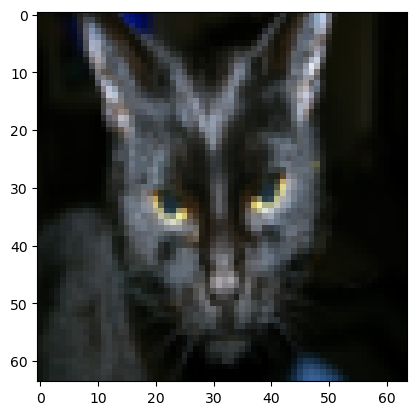

In [3]:
i = 25
plt.imshow(train_set_x_orig[i])
print ("y = " + str(train_set_y[:, i]) + ", it's a '" + classes[np.squeeze(train_set_y[:, i])].decode("utf-8") +  "' picture.")

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
# A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d, a) is to use:
# X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

print('Train set shape', train_set_x_orig.shape)
X_train_flat = train_set_x_orig.reshape(
  train_set_x_orig.shape[0],
  -1
)
X_train_flat = X_train_flat.T

print('Test set shape', test_set_x_orig.shape)
X_test_flat = test_set_x_orig.reshape(
  test_set_x_orig.shape[0],
  -1
)
X_test_flat = X_test_flat.T

print('Train set flattened shape', X_train_flat.shape) # (209, 12288)
print('Test set flattened shape', X_test_flat.shape) # (209, 12288)


Train set shape (209, 64, 64, 3)
Test set shape (50, 64, 64, 3)
Train set flattened shape (12288, 209)
Test set flattened shape (12288, 50)


In [6]:
# Standardization: each value (intensity value 0-255) can be divided by 255 to have it between 0 and 1
X_train = X_train_flat / 255
X_test = X_test_flat / 255

# Helpers

In [7]:
def sigmoid(z):
  return 1/(1 + np.exp(-1 * z))

In [8]:
def initialize_with_zeros(dim):
  return np.zeros((dim, 1)), 0  # w, b

In [9]:
def propagate(w, b, X, Y):
  m = X.shape[1]


  # Forward
  z = np.dot(w.T, X) + b
  A = sigmoid(z)

  cost = np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A), axis=1) / (-m)


  # Backprop
  dj_dz = A - Y
  dj_dw = np.dot(X, dj_dz.T) / m
  dj_db = np.sum(dj_dz, axis=1) / m
  
  grads = {
    'dj_dw': dj_dw,
    'dj_db': dj_db
  }

  return grads, cost

In [10]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dj_dw"]))
print ("db = " + str(grads["dj_db"]))
print ("cost = " + str(cost))

np.testing.assert_array_almost_equal(
  actual=grads['dj_dw'],
  desired=[[0.99845601], [2.39507239]],
  decimal=6,
  err_msg="Wrong value for dj_dw"
)

np.testing.assert_array_almost_equal(
  actual=grads['dj_db'],
  desired=[0.00145558],
  err_msg="Wrong value for dj_db",
  decimal=6
)

np.testing.assert_array_almost_equal(
  actual=cost,
  desired=[5.80154532],
  err_msg="Wrong value for cost",
  decimal=6
)


dw = [[0.99845601]
 [2.39507239]]
db = [0.00145558]
cost = [5.80154532]


In [11]:
def optimize(w_initial, b_initial, X, Y, n_iter, learning_rate=1e-2, print_cost=False):
  costs = []

  params = {
    'w': w_initial,
    'b': b_initial
  }

  grads = dict()

  print(f'Optimizing with {n_iter} iterations.')

  for i in range(n_iter):
    w = params['w']
    b = params['b']
    new_grads, cost = propagate(w, b, X, Y)

    grads = new_grads
    costs.append(cost[0])

    w = w - learning_rate * (new_grads['dj_dw'])
    b = b - learning_rate * (new_grads['dj_db'])

    params['w'] = w
    params['b'] = b
    
  
  if len(costs) != 0 and print_cost:
    print(costs)
  
  return params, grads, costs



In [12]:
params, grads, costs = optimize(w, b, X, Y, n_iter=100, learning_rate=0.009, print_cost=True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dj_dw"]))
print ("db = " + str(grads["dj_db"]))

np.testing.assert_array_almost_equal(
  actual=grads['dj_dw'],
  desired=[[0.67752042], [1.41625495]],
  decimal=6,
  err_msg="Wrong value for dj_dw"
)

np.testing.assert_array_almost_equal(
  actual=grads['dj_db'],
  desired=[0.2191945],
  err_msg="Wrong value for dj_db",
  decimal=6
)

np.testing.assert_array_almost_equal(
  actual=params['w'],
  desired=[[0.19033591], [0.12259159]],
  err_msg="Wrong value for w",
  decimal=6
)

np.testing.assert_array_almost_equal(
  actual=params['b'],
  desired=[1.92535983],
  err_msg="Wrong value for w",
  decimal=6
)

Optimizing with 100 iterations.
[np.float64(5.801545319394553), np.float64(5.7409505028093335), np.float64(5.6803754268955755), np.float64(5.619821667177628), np.float64(5.559290922630777), np.float64(5.4987850248644605), np.float64(5.438305948070815), np.float64(5.377855819606451), np.float64(5.317436931189181), np.float64(5.257051750930272), np.float64(5.19670293604073), np.float64(5.136393346354229), np.float64(5.0761260586313774), np.float64(5.015904381700863), np.float64(4.955731872427953), np.float64(4.895612352538272), np.float64(4.835549926277942), np.float64(4.7755489989189925), np.float64(4.71561429608081), np.float64(4.6557508838423285), np.float64(4.595964189588867), np.float64(4.536260023537635), np.float64(4.476644600852061), np.float64(4.417124564226808), np.float64(4.357707006833279), np.float64(4.298399495423375), np.float64(4.239210093432047), np.float64(4.180147383816734), np.float64(4.121220491375143), np.float64(4.062439104215671), np.float64(4.003813494033474), np

In [13]:
def predict(w, b, X):
  m = X.shape[1] # n x m
  y_preds = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1) # n

  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    y_preds[0][i] = 0 if A[0][i] <= 0.5 else 1

  assert y_preds.shape == (1, m), 'Wrong shape for y_preds in predict()'

  return y_preds  


In [14]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [19]:
def model(
    X_train,
    Y_train,
    X_test,
    Y_test,
    n_iter=2000,
    learning_rate=0.5,
    print_cost=False
):

  w, b = initialize_with_zeros(X_train.shape[0])
  params, _, costs = optimize(
    w,
    b,
    X_train,
    Y_train,
    n_iter,
    learning_rate,
    print_cost
  )

  print(f'Optimization returned costs array of len {len(costs)}')

  optimal_w = params['w']
  optimal_b = params['b']

  test_preds = predict(optimal_w, optimal_b, X_test)
  train_preds = predict(optimal_w, optimal_b, X_train)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(train_preds - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(test_preds - Y_test)) * 100))

  return {
    'costs': costs,
    'y_preds_test': test_preds,
    'y_preds_train': train_preds,
    'w': w,
    'b': b,
    'learning_rate': learning_rate,
    'num_iterations': n_iter
  }

In [59]:
def iter_learning_rates(
  X_train,
  Y_train,
  X_test,
  Y_test,
  n_iter=2000,
  print_cost=False,
  learning_rates: list[float]=[1e-2]
):
  results = []
  learning_rates.sort()

  for r in learning_rates:
    d = model(X_train, train_set_y, X_test, test_set_y, n_iter = 2000, learning_rate = r, print_cost = False)
    results.append(d)

  
  # Plot
  n = len(results)
  columns = 2
  rows = n // 2 if n % 2 == 0 else n // 2 + 1

  fig, axs = plt.subplots(rows, columns, sharex='all', figsize=(10, 10))
  
  col = 0

  for i, ax in enumerate(axs.flat):
    if i >= len(results):
      ax.remove()
      continue

    data = results[i]
    costs = data['costs']
    ax.set_title(f'Learning rate: {data['learning_rate']}')
    ax.plot(
      np.arange(len(costs)),
      costs
    )


  

In [ ]:
d = model(X_train, train_set_y, X_test, test_set_y, n_iter = 2000, learning_rate = 0.005, print_cost = False)

Optimizing with 2000 iterations.
[np.float64(0.6931471805599453), np.float64(0.7410294145065183), np.float64(0.7531535818862111), np.float64(0.8667086956701202), np.float64(0.7685635006608347), np.float64(0.8970144736447933), np.float64(0.7556132280568215), np.float64(0.880436642683987), np.float64(0.7514852682041283), np.float64(0.8771330533999597), np.float64(0.7449403578103343), np.float64(0.8694790305710142), np.float64(0.7395380761496434), np.float64(0.8631813827864874), np.float64(0.7341140373099904), np.float64(0.8564988745006686), np.float64(0.7289883166665418), np.float64(0.8499947121719624), np.float64(0.7240300591410962), np.float64(0.843519150240876), np.float64(0.7192489303106332), np.float64(0.8371297668639592), np.float64(0.7146178461453454), np.float64(0.8308196474365938), np.float64(0.7101237125685045), np.float64(0.8245968156414776), np.float64(0.7057525912197259), np.float64(0.818462789308895), np.float64(0.7014932393013826), np.float64(0.8124189543586329), np.float6

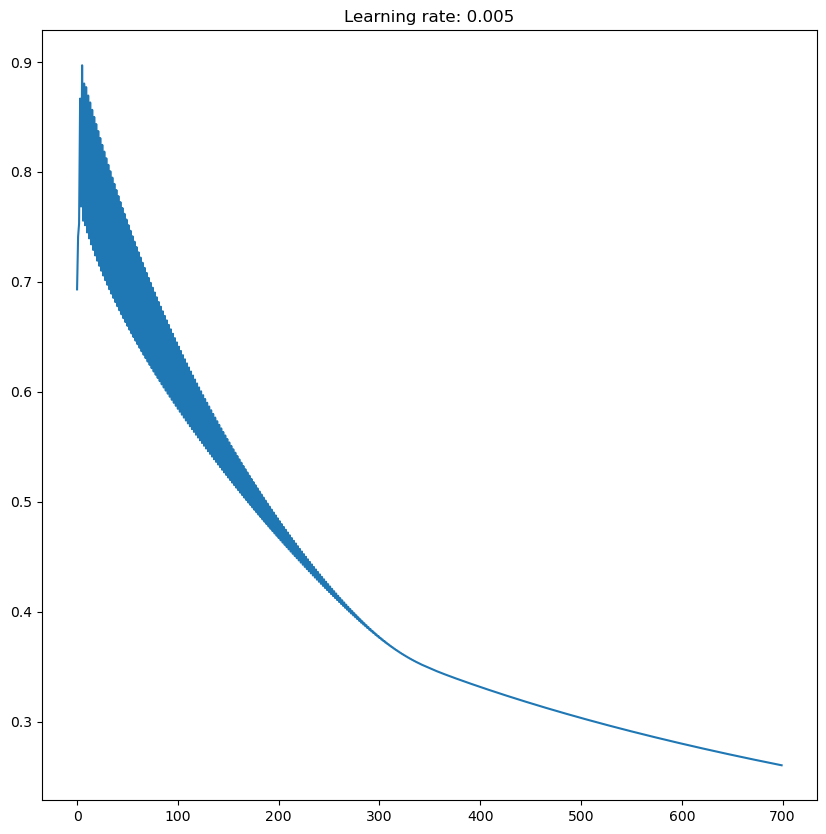

In [47]:
# Learning curve
costs = d['costs'][:700]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title(f'Learning rate: {d['learning_rate']}')
ax.plot(
  np.arange(len(costs)),
  costs
);

Optimizing with 2000 iterations.
Optimization returned costs array of len 2000
train accuracy: 71.29186602870814 %
test accuracy: 40.0 %
Optimizing with 2000 iterations.
Optimization returned costs array of len 2000
train accuracy: 86.60287081339713 %
test accuracy: 62.0 %
Optimizing with 2000 iterations.
Optimization returned costs array of len 2000
train accuracy: 91.38755980861244 %
test accuracy: 68.0 %
Optimizing with 2000 iterations.
Optimization returned costs array of len 2000
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
Optimizing with 2000 iterations.
Optimization returned costs array of len 2000
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


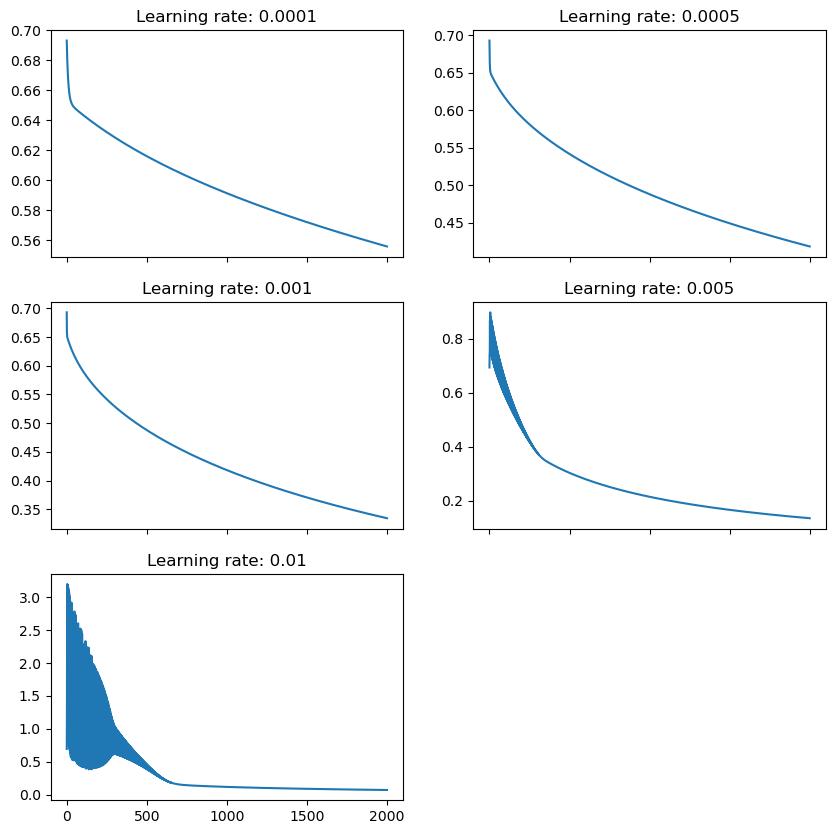

In [61]:

iter_learning_rates(X_train, train_set_y, X_test, test_set_y, n_iter = 1250, learning_rates=[0.005, 0.001, 0.0005, 0.01, 0.0001], print_cost = False)